In [333]:
import os
import collections
import numpy as np
from vocab import Vocab
from dataset import Dataset
import pandas

In [3]:
dataset = Dataset(max_len=54, preshuffle=False, batch_size=10)
dataset.ReadData('/n/falcon/s0/ajaech/reddit.tsv.bz2', ['subreddit', 'text'], mode='eval', 
                splitter='word', limit=15000000)

loaded 3000000 sentences


In [353]:
buildapc = {'true': '/s0/ajaech/builda.txt',
            'hash': '/s0/ajaech/hashbuilda.txt',
             'greedy': '/s0/ajaech/nohashbuilda.txt'}

askscience = {'true': '/s0/ajaech/askscience.txt',
            'hash': 'exps/newstrat7/allaskscience.txt',
             'greedy': 'exps/newstrat14/askscience.txt'}

math = {'true': '/s0/ajaech/askscience.txt',
            'hash': 'exps/newstrat7/math.txt',
             'greedy': 'exps/newstrat14/math.txt'}

frugal = {'true': '/s0/ajaech/askscience.txt',
            'hash': 'exps/newstrat7/Frugal.txt',
             'greedy': 'exps/newstrat14/Frugal.txt'}

filenames = askscience

In [354]:
vocab = Vocab.Load('exps/newstrat15/word_vocab.pickle')

In [355]:
def GetCounts(lines):
    counter = collections.Counter()
    for line in lines:
        words = line.split()
        counter.update(words)
    return counter

In [356]:
with open(filenames['hash'], 'r') as f:
    lines = f.readlines()
    hash_counts = GetCounts(lines)

In [357]:
with open(filenames['greedy'], 'r') as f:
    lines = f.readlines()
    greedy_counts = GetCounts(lines)

In [358]:
true_lines = dataset.data.text[dataset.data.subreddit == 'askscience']
true_counts = collections.Counter()
for line in true_lines:
    true_counts.update(line[1:])
print len(true_lines)

2252


In [359]:
all_words = vocab.GetWords()
def Convert(counts, prior=1):
    counts.update(all_words)
    del counts['<UNK>']
    total = float(sum(counts.values()))
    probs = [(w, counts[w] / total) for w in counts]
    return dict(probs)

In [360]:
true_probs = Convert(true_counts)
greedy_probs = Convert(greedy_counts)
hash_probs = Convert(hash_counts)

In [361]:
table = []
for word in all_words:
    true_p = true_probs.get(word, 0.0)
    greedy_p = greedy_probs.get(word, 0.0)
    hash_p = hash_probs.get(word, 0.0)
    if max(true_counts[word], hash_counts[word], greedy_counts[word]) > 20 and word in vocab:
        table.append({'word': word, 'truep': true_p, 'greedyp': greedy_p, 'hashp': hash_p,
                      'hash_count': hash_counts[word], 'greedy_count': greedy_counts[word]})

In [362]:
min(hash_counts.values())

1

In [363]:
df = pandas.DataFrame(table)

In [364]:
df['greedyratio'] = np.log10(df.truep / df.greedyp)
df['hashratio'] = np.log10(df.truep / df.hashp)
df['worst'] = df[['greedyratio', 'hashratio']].max(axis=1)
df.sort_values('worst', ascending=False)

,greedy_count,greedyp,hash_count,hashp,truep,word,greedyratio,hashratio,worst
1798,13,0.000015,41,0.000103,0.000218,photon,1.159144,0.327988,1.159144
2373,28,0.000033,1,0.000003,0.000027,sustained,-0.077161,1.037681,1.037681
2243,35,0.000041,1,0.000003,0.000027,son,-0.174071,1.037681,1.037681
2195,58,0.000068,6,0.000015,0.000155,singularity,0.359897,1.012858,1.012858
106,22,0.000026,2,0.000005,0.000045,address,0.249423,0.958500,0.958500
2618,10,0.000012,50,0.000125,0.000091,wave,0.892876,-0.138410,0.892876
2253,1,0.000001,29,0.000073,0.000009,source=lnms,0.892876,-0.901838,0.892876
1245,24,0.000028,2,0.000005,0.000036,incredible,0.114725,0.861590,0.861590
402,34,0.000040,1,0.000003,0.000018,category,-0.337573,0.861590,0.861590
25,23,0.000027,1,0.000003,0.000018,//en.wikipedia.org/wiki/file,-0.167822,0.861590,0.861590


In [365]:
from matplotlib import pyplot

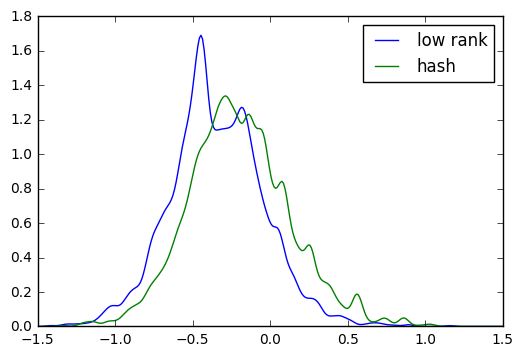

In [366]:
from scipy.stats import gaussian_kde
density = gaussian_kde(df.greedyratio)
density2 = gaussian_kde(df.hashratio)
xs = np.linspace(-1.5, 1.5, 300)
density.covariance_factor = lambda : .1
density2.covariance_factor = lambda : .1
density._compute_covariance()
density2._compute_covariance()
pyplot.plot(xs, density(xs))
pyplot.plot(xs, density2(xs))
pyplot.legend(['low rank', 'hash'])
#pyplot.semilogy()
pyplot.show()